In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import ipywidgets as widgets
from IPython.display import display
from scipy.stats import ttest_ind
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Fibovin/des_modelos_1/refs/heads/main/Student_Performance.csv')
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### **Datos faltantes**

<Figure size 1000x600 with 0 Axes>

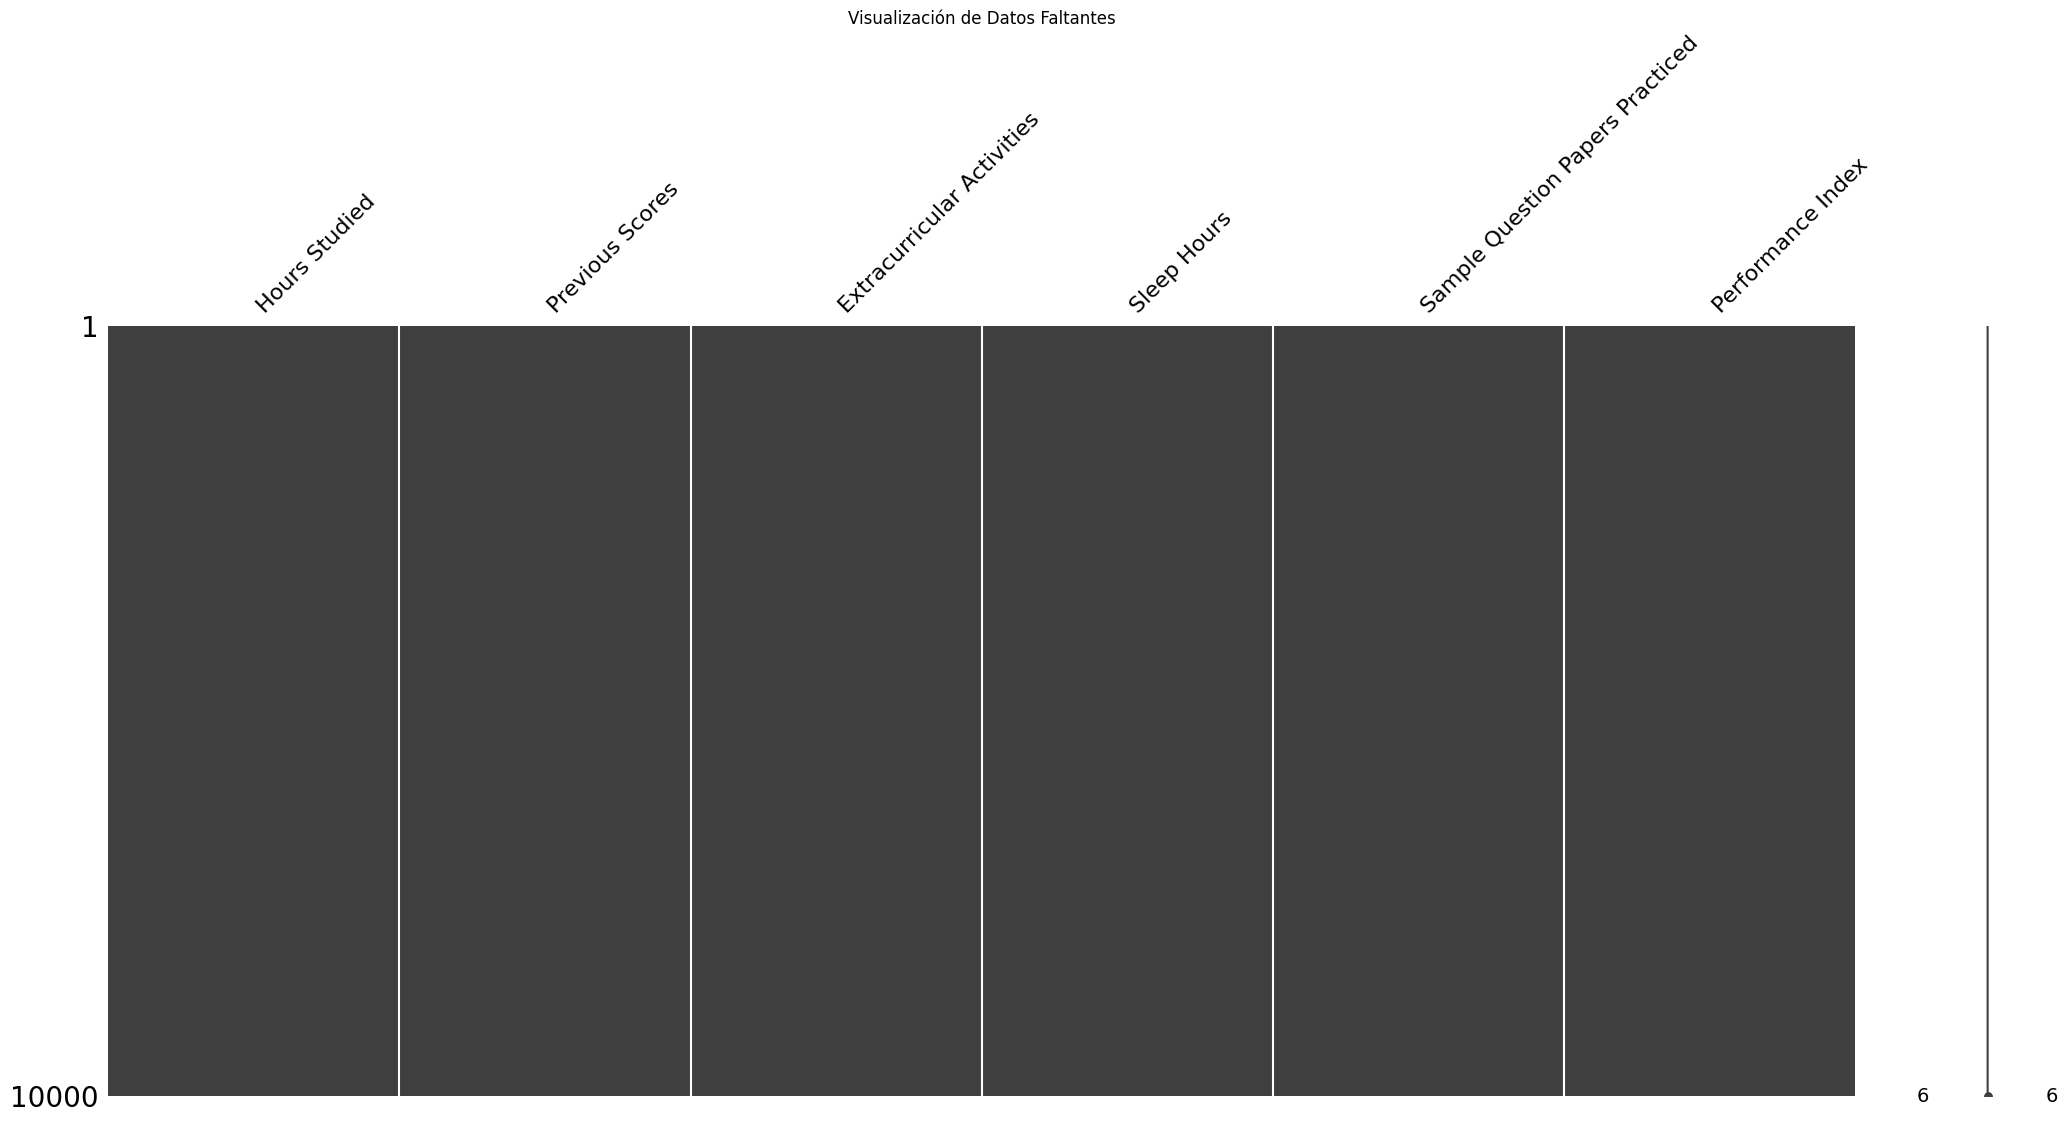

In [ ]:
plt.figure(figsize=(10, 6)) #Datos faltantes
msno.matrix(df)
plt.title('Visualización de Datos Faltantes')
plt.show()

Podemos apreciar que no se observaron datos faltantes en el datset.

### **Medidas de tendencia central**

In [ ]:
descriptivo = df.describe().T  #análisis de tendencia central de los datos
descriptivo1 = tabulate(descriptivo, headers='keys', tablefmt='pretty', floatfmt=".2f")
print(descriptivo1)

+----------------------------------+---------+---------+--------------------+------+------+------+------+-------+
|                                  |  count  |  mean   |        std         | min  | 25%  | 50%  | 75%  |  max  |
+----------------------------------+---------+---------+--------------------+------+------+------+------+-------+
|          Hours Studied           | 10000.0 | 4.9929  | 2.589308796185612  | 1.0  | 3.0  | 5.0  | 7.0  |  9.0  |
|         Previous Scores          | 10000.0 | 69.4457 | 17.343152251047066 | 40.0 | 54.0 | 69.0 | 85.0 | 99.0  |
|           Sleep Hours            | 10000.0 | 6.5306  | 1.6958629765176023 | 4.0  | 5.0  | 7.0  | 8.0  |  9.0  |
| Sample Question Papers Practiced | 10000.0 | 4.5833  | 2.8673477777081713 | 0.0  | 2.0  | 5.0  | 7.0  |  9.0  |
|        Performance Index         | 10000.0 | 55.2248 | 19.212557799463323 | 10.0 | 40.0 | 55.0 | 71.0 | 100.0 |
+----------------------------------+---------+---------+--------------------+------+----

En cuanto a los puntajes previos, estos promedian 69.4, con un rango que va desde 40 hasta 99, mostrando una amplia diversidad en el desempeño anterior. Las horas de sueño están en promedio cerca de 6.5 horas, por lo tanto es una tendencia hacia una cantidad moderada de sueño, aunque algunos duermen solo 4 horas y otros hasta 9. Los estudiantes practican en promedio unas 4.6 muestras de exámenes, nuevamente con variación considerable, lo que indica diferentes niveles de preparación. Por último, el Performance Index promedio es 55.2, con una dispersión amplia desde 10 hasta 100, sugiriendo variaciones notables en el rendimiento entre estudiantes.

### **Análisis de distribuciones**

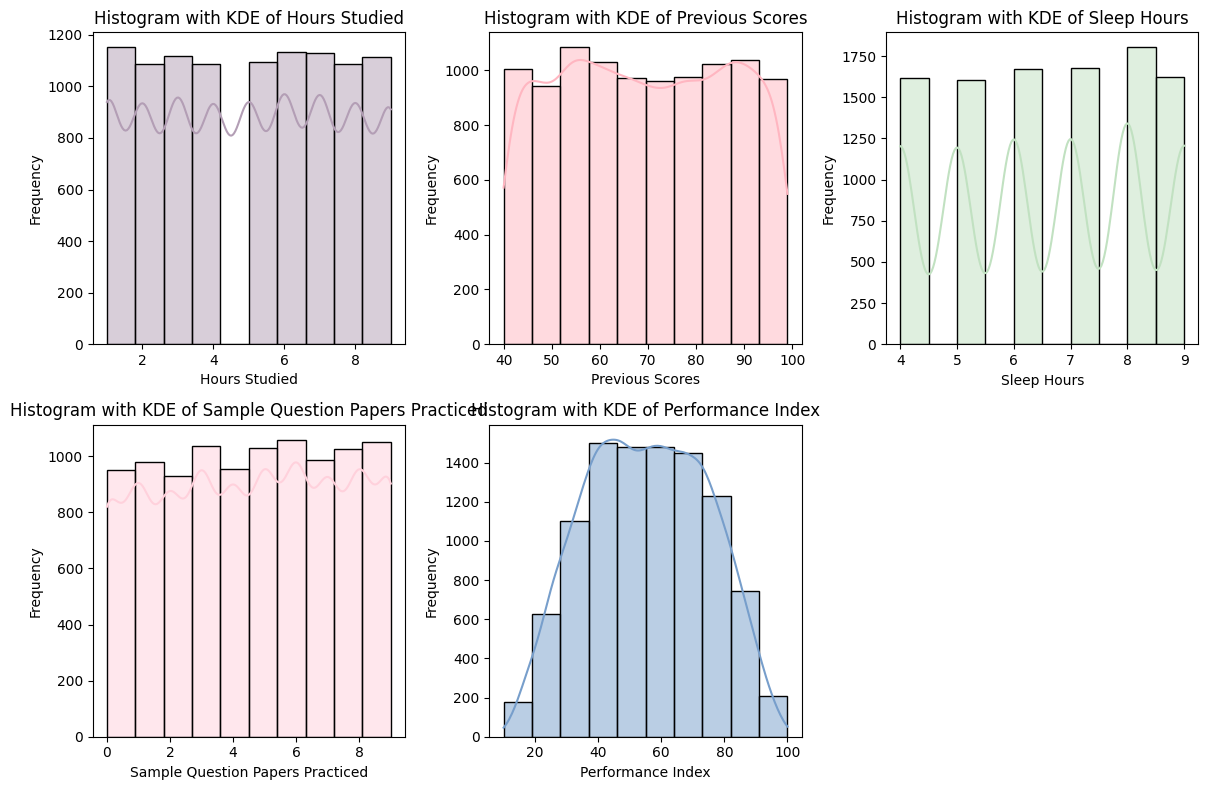

In [ ]:
#Calculamos la densidad y y graficamos los histogramas
colores = ['#B39EB5', '#FFB6C1', '#C1E1C1', '#FFD1DC', '#779ECB']
plt.figure(figsize=(12, 8))
for i, (column, color) in enumerate(zip(df.select_dtypes(include='number').columns, colores), 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], bins=10, kde=True, color=color, edgecolor='black')
    plt.title(f'Histogram with KDE of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Con las distribuciones por histogramas podemos apreciar algunas tendencias interesantes en cada variable. Las horas estudiadas parecen estar distribuidas de manera uniforme entre 1 y 9, sin que haya un número claro de horas predominante. Los puntajes previos también están bastante repartidos entre 40 y 100, con algunos picos sutiles, por lo tanto que no hay una tendencia fuerte hacia un puntaje específico. Las horas de sueño están moderadamente distribuidas entre 4 y 9, lo que quiere decir que la mayoría de los estudiantes mantienen una cantidad de sueño similar, aunque con leves variaciones. En cuanto a los exámenes de práctica, los estudiantes tienden a practicar un número diverso de exámenes, aunque la mayoría parece hacerlo en una cantidad intermedia. Finalmente, el Performance Index muestra una distribución más definida, con una concentración alrededor de los valores medios (entre 40 y 70), lo que indica que el rendimiento de la mayoría de los estudiantes se encuentra en este rango.

### **Análisis de diagramas de cajas**

<ipython-input-6-852bf909642c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Extracurricular Activities', y=column, data=df, palette=colores[:2])
<ipython-input-6-852bf909642c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Extracurricular Activities', y=column, data=df, palette=colores[:2])
<ipython-input-6-852bf909642c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Extracurricular Activities', y=column, data=df, palette=colores[:2])
<ipython-input-6-852bf909642c>:5: FutureWarning: 

Passing `palette` without assigning `hue

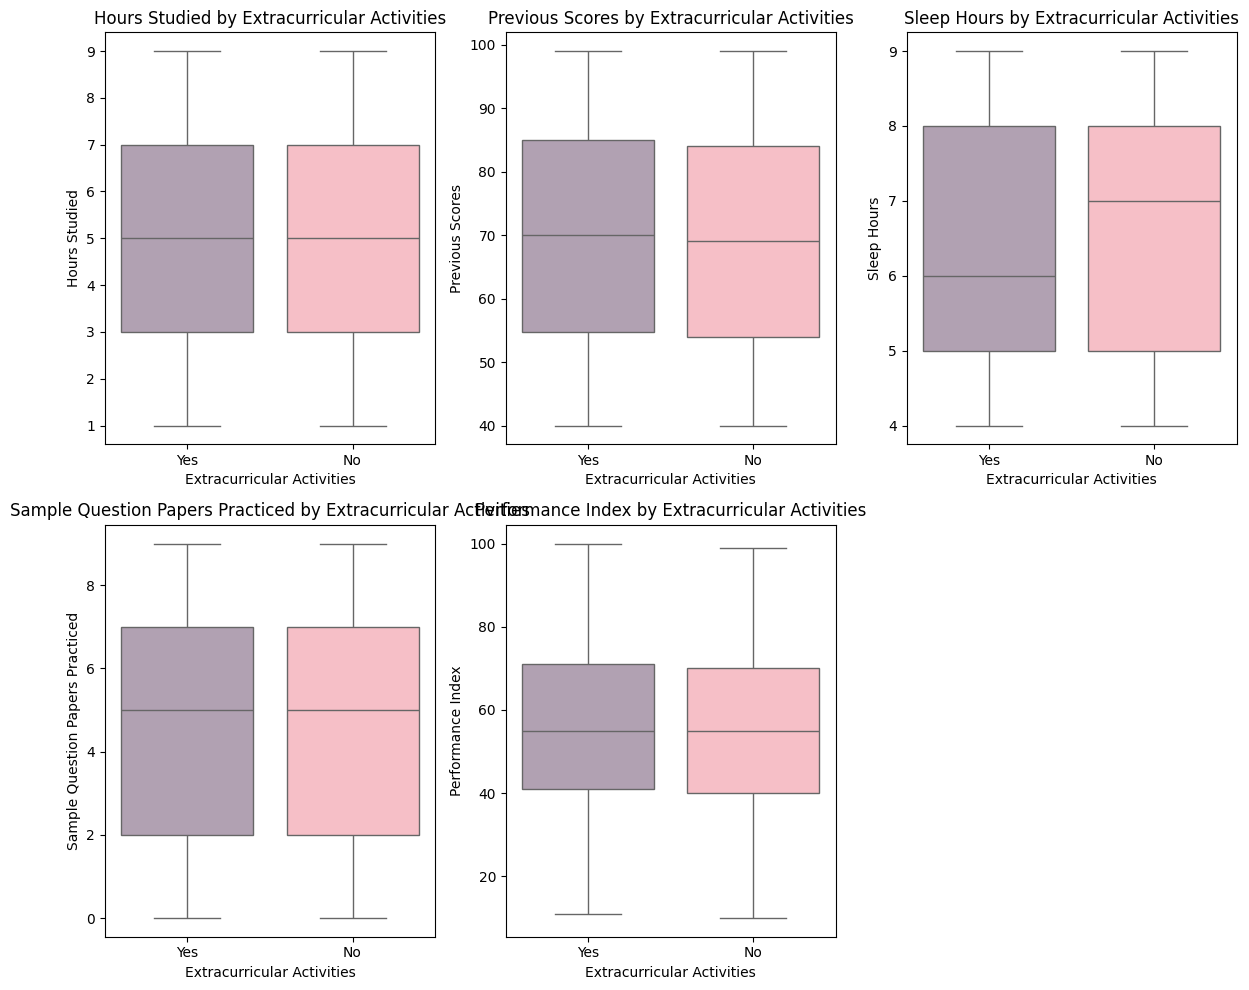

In [ ]:
plt.figure(figsize=(12, 10))

for i, (column, color) in enumerate(zip(df.select_dtypes(include='number').columns, colores), 1): #Creamos los graficos de cajas por cada variables
    plt.subplot(2, 3, i)
    sns.boxplot(x='Extracurricular Activities', y=column, data=df, palette=colores[:2])
    plt.title(f'{column} by Extracurricular Activities')
    plt.xlabel('Extracurricular Activities')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


En estos gráficos, podemos ver cómo los estudiantes que participan en actividades extracurriculares tienden a estudiar un poco más de horas, aunque la diferencia no es enorme. Sus puntajes previos también son ligeramente más altos en comparación con aquellos que no participan en dichas actividades. En cuanto a las horas de sueño, ambos grupos muestran una distribución similar, con una mediana alrededor de las 7 horas. Al ver la cantidad de exámenes de práctica realizados, nuevamente hay una ligera diferencia a favor de los que participan en actividades extracurriculares. Finalmente, en el Performance Index, el grupo que realiza actividades extracurriculares parece tener un rendimiento algo mejor en promedio, aunque ambos grupos tienen una variabilidad considerable.

### **Análisis de correlación**

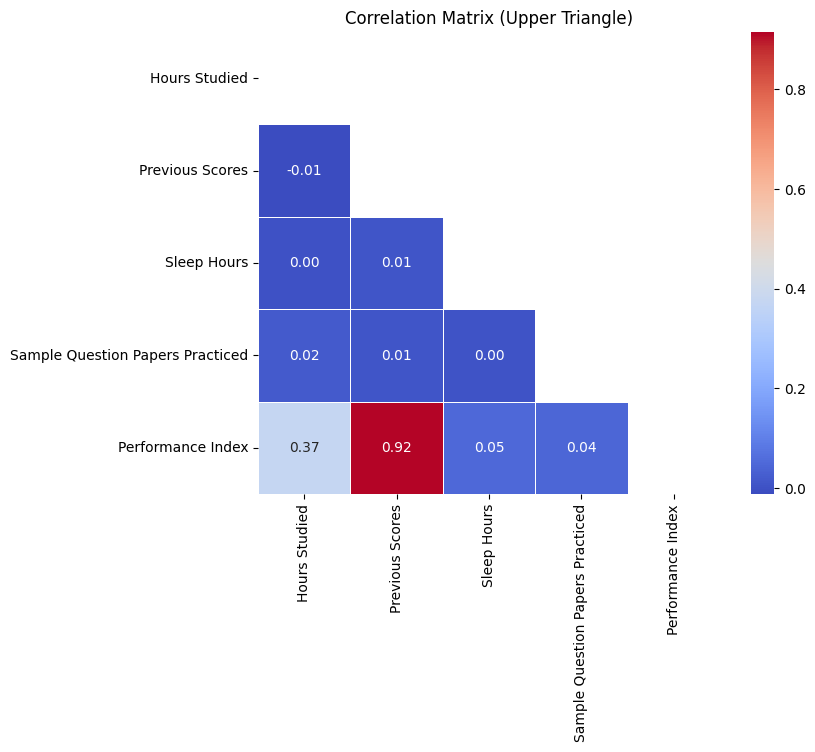

In [ ]:
correlation_matrix = df.select_dtypes(include='number').corr() #variables númericas para poder interpretar la correlación de variables
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', square=True, linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix (Upper Triangle)')
plt.show()


En esta matriz de correlación, podemos ver que Previous Scores y Performance Index tienen una relación bastante fuerte, con una correlación de 0.92, lo que muestra que los puntajes previos están muy relacionados con el rendimiento actual. Hours Studied también tiene una correlación positiva con Performance Index, aunque es más moderada (0.37), indicando que estudiar más horas podría ayudar a mejorar el rendimiento, pero no de forma tan directa como los puntajes previos. Las demás variables, como Sleep Hours y Sample Question Papers Practiced, muestran correlaciones muy bajas con el Performance Index, lo que sugiere que no tienen una relación significativa con el rendimiento de los estudiantes en este conjunto de datos.

### **Análisis de relación**

<Figure size 1000x600 with 0 Axes>

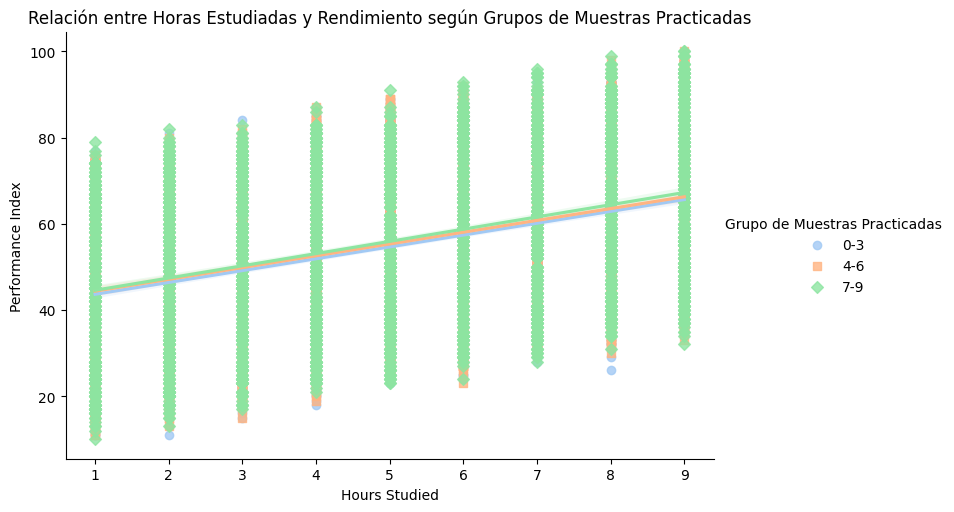

In [ ]:
df['Grupo de Muestras Practicadas'] = pd.cut(df['Sample Question Papers Practiced'], bins=[-1, 3, 6, 9], labels=['0-3', '4-6', '7-9']) # Agrupamos 'Sample Question Papers Practiced' en intervalos de 3 para simplificar el gráfico
plt.figure(figsize=(10, 6))
sns.lmplot(x='Hours Studied', y='Performance Index', hue='Grupo de Muestras Practicadas', data=df, aspect=1.5, palette="pastel", markers=["o", "s", "D"])
plt.title('Relación entre Horas Estudiadas y Rendimiento según Grupos de Muestras Practicadas')
plt.show()

En este gráfico, vemos cómo el rendimiento (Performance Index) se relaciona con las horas estudiadas (Hours Studied), desglosado por grupos de muestras practicadas (Grupo de Muestras Practicadas). La línea de tendencia muestra una ligera inclinación positiva, lo que indica que a medida que los estudiantes aumentan sus horas de estudio, su rendimiento tiende a mejorar, aunque la relación no es muy pronunciada. Los colores representan distintos grupos de cantidad de muestras de exámenes practicados, y parece que no hay una diferencia clara en el rendimiento entre los distintos grupos de prácticas. Esto quiere decir que, en este caso, el número de muestras practicadas no tiene un efecto significativo sobre el rendimiento cuando se controla por las horas estudiadas.

### **Análisis de densidad**

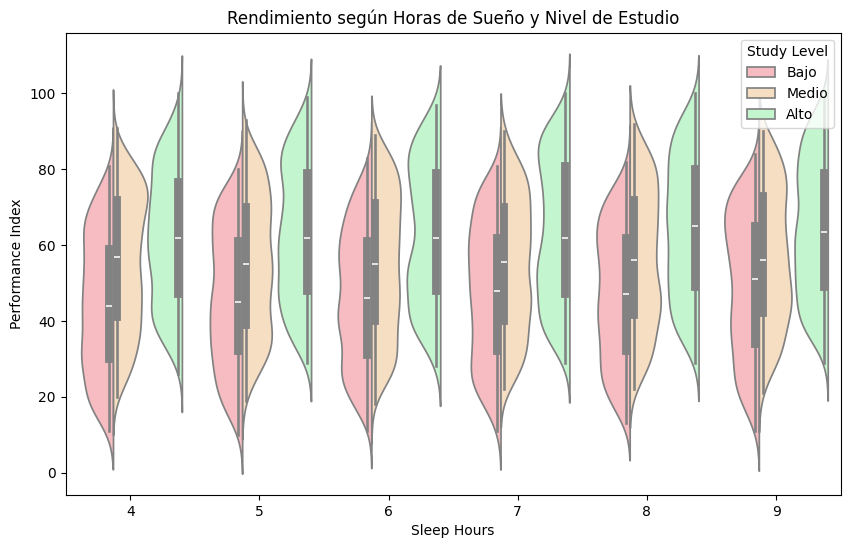

In [ ]:
df['Study Level'] = pd.cut(df['Hours Studied'], bins=[0, 3, 6, 10], labels=['Bajo', 'Medio', 'Alto']) #Clasificamos de las horas estudiadas en tres grupos: bajas, medias, altas

custom_palette = ["#FFB3BA", "#FFDFBA", "#Baffc9"]
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sleep Hours', y='Performance Index', hue='Study Level', data=df, palette=custom_palette, split=True)
plt.title('Rendimiento según Horas de Sueño y Nivel de Estudio')
plt.show()

En este gráfico de violín, se muestra la relación entre las horas de sueño (Sleep Hours), el rendimiento (Performance Index), y el nivel de estudio (Study Level). Los estudiantes con un nivel de estudio alto tienden a tener un rendimiento más elevado en comparación con los niveles medio y bajo, independientemente de la cantidad de horas de sueño. Aunque hay variabilidad en todos los niveles de estudio, los que duermen entre 6 y 8 horas y tienen un nivel de estudio alto parecen obtener los mejores resultados de rendimiento. No se observa una relación clara entre el rendimiento y las horas de sueño en sí, lo que sugiere que el nivel de estudio es un factor más determinante en el rendimiento que el sueño.

### **Análisis de relaciones entre variables académicas y rendimiento estudiantil**

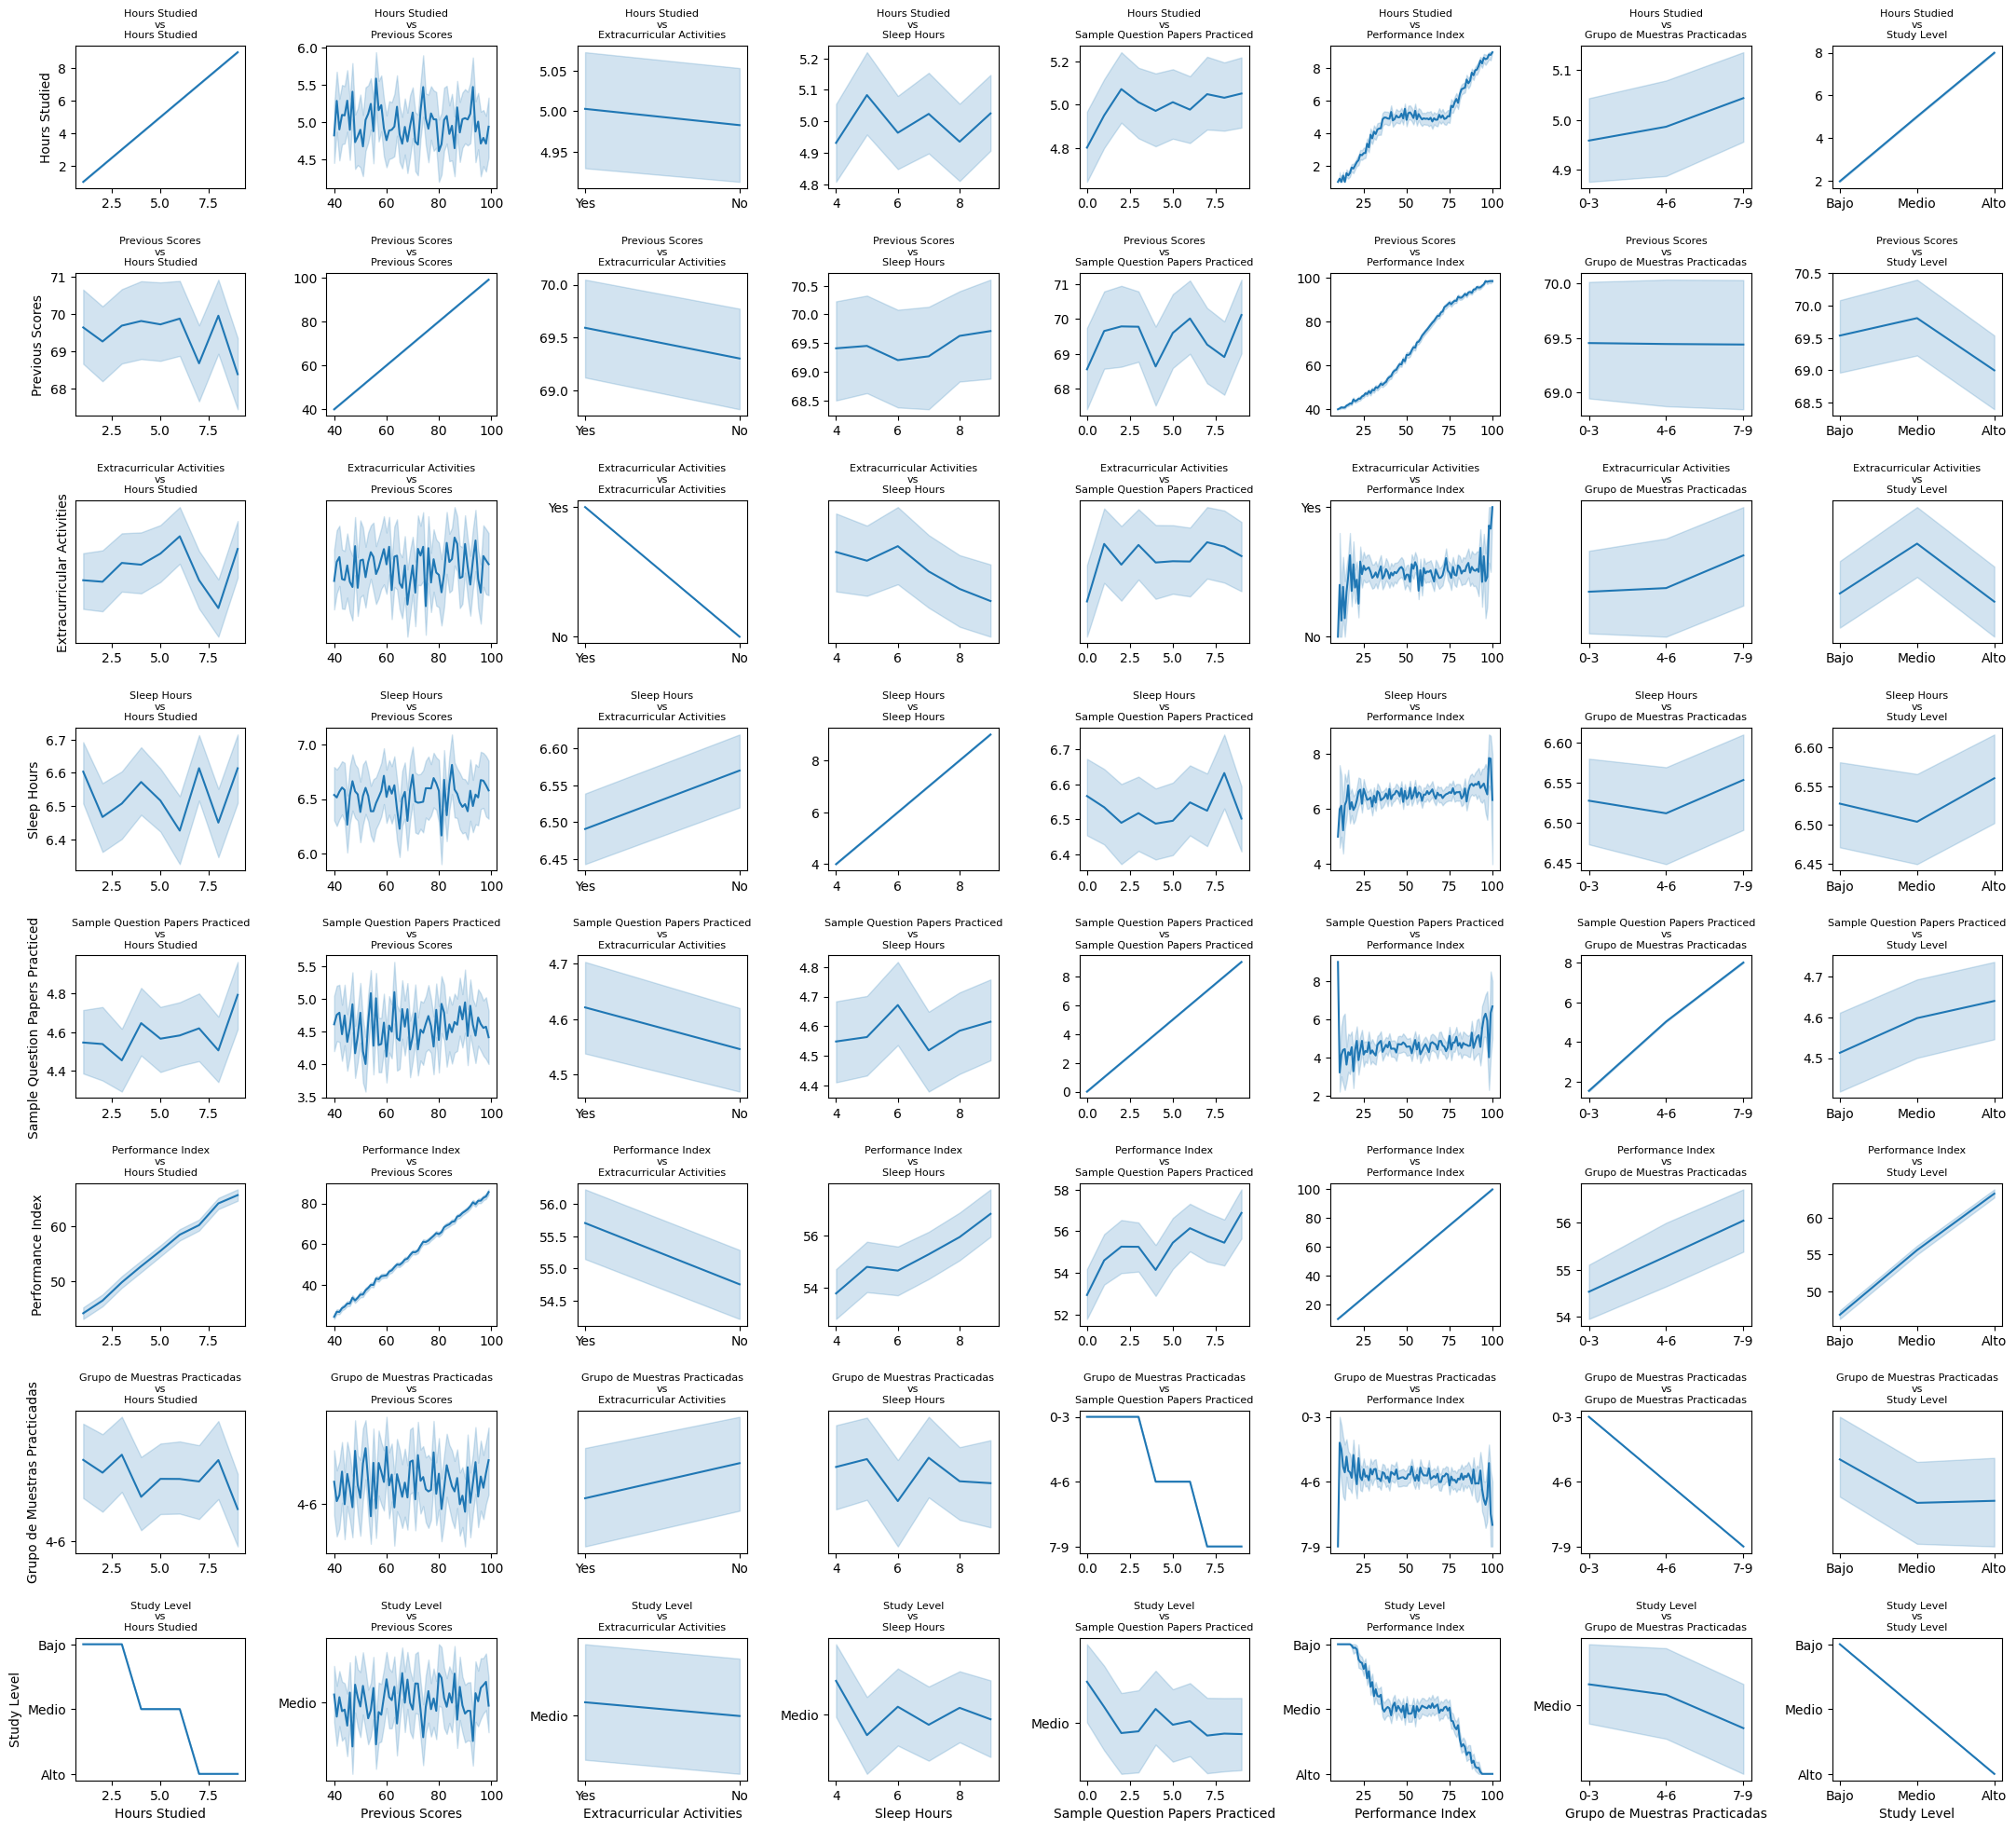

In [ ]:
rows, cols = df.shape[1], df.shape[1]  # Definimos las dimensiones del grid para los subplots
fig, axes = plt.subplots(rows, cols, figsize=(22, 20))

#Iteramos las columnas
for ind_x, column_x in enumerate(df.columns):
    for ind_y, column_y in enumerate(df.columns):
        sns.lineplot(x=df[column_y], y=df[column_x], ax=axes[ind_x, ind_y])

        axes[ind_x, ind_y].set_title(f'{column_x}\nvs\n{column_y}', fontsize=8)

        if ind_x == df.shape[1] - 1:
            axes[ind_x, ind_y].set_xlabel(column_y)
        else:
            axes[ind_x, ind_y].set_xlabel('')

        if ind_y == 0:
            axes[ind_x, ind_y].set_ylabel(column_x)
        else:
            axes[ind_x, ind_y].set_ylabel('')

# Ajustamos el espacio entre subplots
plt.tight_layout(pad=2.0, h_pad=2.0, w_pad=2.0)
plt.show()

En este análisis de relaciones entre variables académicas y rendimiento estudiantil, vemos que las horas de estudio y los puntajes previos tienen una conexión moderada con el Performance Index, lo que indica que estos factores influyen en el rendimiento. Los estudiantes con puntajes previos altos tienden a mantener buenos resultados, mientras que más horas de estudio también se asocian con un mejor rendimiento. Las actividades extracurriculares y las horas de sueño muestran menos influencia directa, pero podrían tener efectos en combinación con otros factores, como el nivel de estudio. En general, el rendimiento parece estar más ligado a la preparación académica previa y a los hábitos de estudio constantes.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

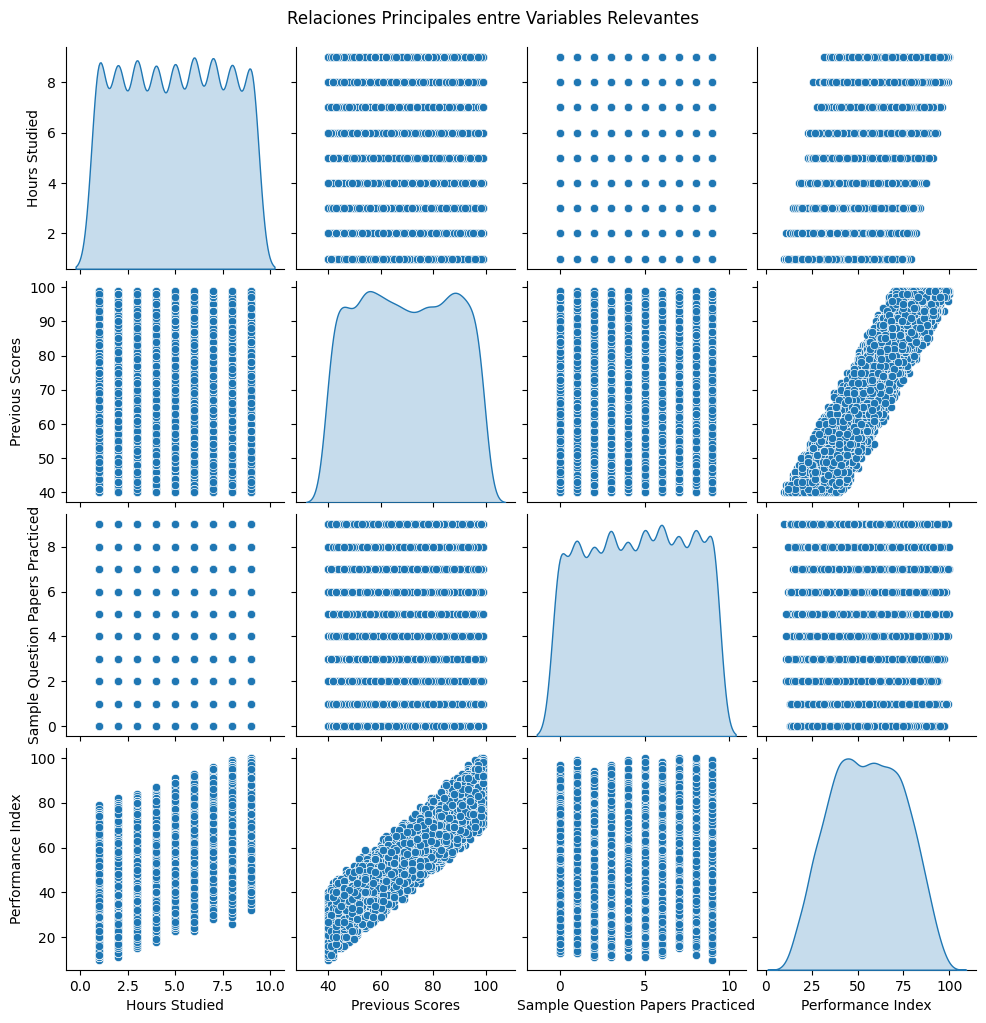

In [ ]:
selected_vars = ['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced', 'Performance Index'] #Selección de las variables más relevantes para relaizar el mismo análisis
sns.pairplot(df[selected_vars], kind='scatter', diag_kind='kde', palette="pastel")
plt.suptitle("Relaciones Principales entre Variables Relevantes", y=1.02)
plt.show()


En esta matriz de dispersión, observamos cómo se relacionan entre sí variables clave como las horas de estudio, puntajes previos, exámenes de práctica, y el índice de rendimiento (Performance Index). La relación más fuerte se da entre los puntajes previos y el rendimiento, con una clara tendencia lineal que muestra que a mayores puntajes previos, mejor es el Performance Index. Las horas de estudio también muestran una relación positiva con el rendimiento, aunque menos pronunciada. Por otro lado, los exámenes de práctica y las otras variables no parecen tener una conexión tan clara entre sí o con el rendimiento, mostrando una dispersión más uniforme en sus valores.

### **Prueba de hipotesis chi-cuadrado**

╒════════════════╤═══════════╤══════════════════════╕
│   Chi-cuadrado │   p-valor │   Grados de libertad │
╞════════════════╪═══════════╪══════════════════════╡
│        1.76679 │  0.413377 │                    2 │
╘════════════════╧═══════════╧══════════════════════╛


<Figure size 1000x600 with 0 Axes>

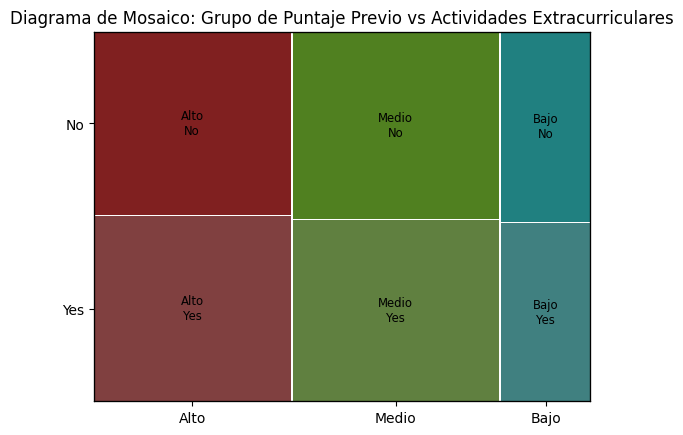

In [ ]:
df['Previous Score Group'] = pd.cut(df['Previous Scores'], bins=[0, 50, 75, 100], labels=['Bajo', 'Medio', 'Alto']) # Creamos los grupos de rangos para 'Previous Scores'
contingency_table = pd.crosstab(df['Previous Score Group'], df['Extracurricular Activities']) #Creamos una tabla de contingencia entre 'Previous Score Group' y 'Extracurricular Activities'

#Realizamos la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2_results = {
    "Chi-cuadrado": [chi2],
    "p-valor": [p],
    "Grados de libertad": [dof]
}
print(tabulate(chi2_results, headers="keys", tablefmt="fancy_grid"))


plt.figure(figsize=(10, 6))
mosaic(df, ['Previous Score Group', 'Extracurricular Activities'], title='Diagrama de Mosaico: Grupo de Puntaje Previo vs Actividades Extracurriculares')
plt.show()

En este análisis de asociación entre el grupo de puntaje previo y la participación en actividades extracurriculares, el valor de Chi-cuadrado es 1.77 con un p-valor de 0.41, lo que muestra que no existe una relación estadísticamente significativa entre estos dos factores. El diagrama de mosaico muestra cómo se distribuyen los estudiantes según su grupo de puntaje (Bajo, Medio, Alto) y su participación en actividades extracurriculares. Visualmente, las proporciones en cada combinación de categorías son bastante similares, lo cual es consistente con los resultados de la prueba estadística, que confirma la independencia entre el grupo de puntaje previo y la participación en actividades extracurriculares en este conjunto de datos.

### **Prueba de hipotesis t-student**

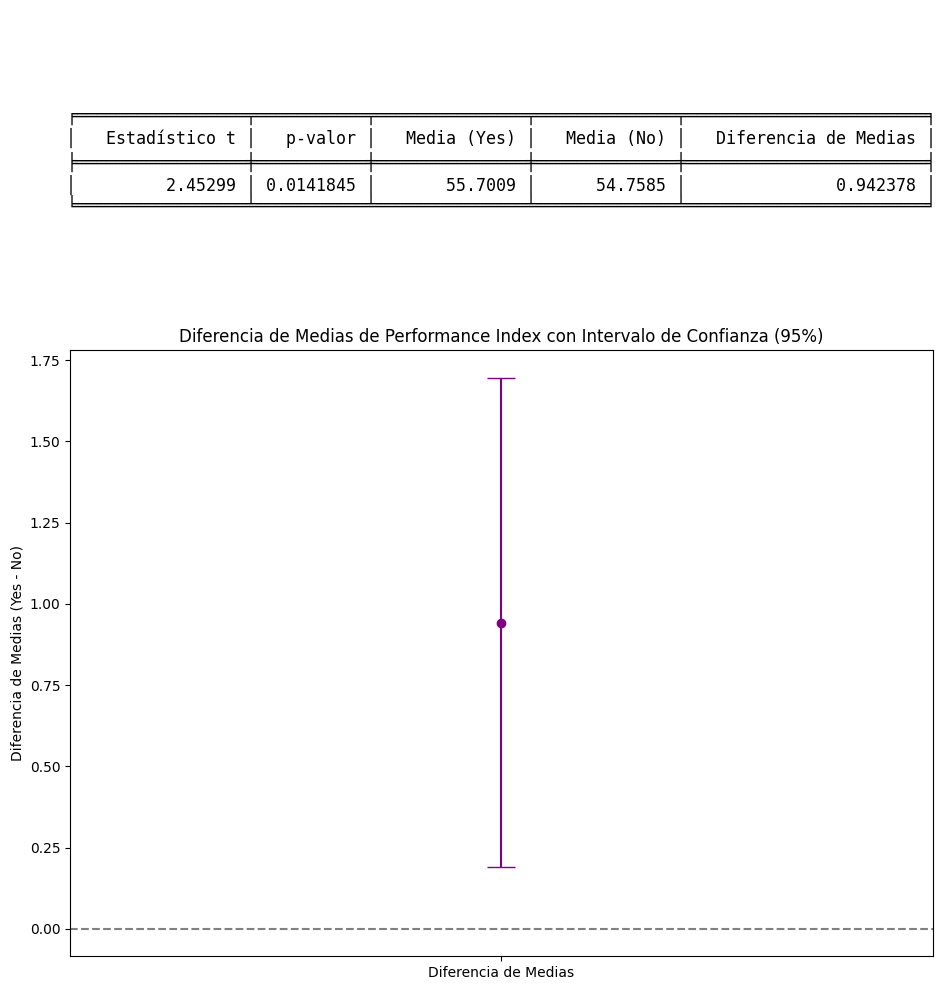

In [ ]:
#Dividmos los datos en dos grupos
group_yes = df[df['Extracurricular Activities'] == 'Yes']['Performance Index']
group_no = df[df['Extracurricular Activities'] == 'No']['Performance Index']

#rEALIMAOS la prueba T de Student
t_stat, p_val = ttest_ind(group_yes, group_no)

t_test_results = {
    "Estadístico t": [t_stat],
    "p-valor": [p_val],
    "Media (Yes)": [group_yes.mean()],
    "Media (No)": [group_no.mean()],
    "Diferencia de Medias": [group_yes.mean() - group_no.mean()]
}
t_test_table = tabulate(t_test_results, headers="keys", tablefmt="fancy_grid")

confidence_level = 0.95
degrees_freedom = len(group_yes) + len(group_no) - 2
mean_diff = group_yes.mean() - group_no.mean()
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=mean_diff,
                                       scale=np.sqrt(stats.sem(group_yes) ** 2 + stats.sem(group_no) ** 2))

fig, ax = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [1, 2]})

ax[0].axis('off')
ax[0].text(0.5, 0.5, t_test_table, ha='center', va='center', fontsize=12, fontfamily="monospace")


ax[1].errorbar(['Diferencia de Medias'], [mean_diff],
               yerr=[[mean_diff - confidence_interval[0]], [confidence_interval[1] - mean_diff]],
               fmt='o', color='purple', capsize=10)
ax[1].axhline(0, color='gray', linestyle='--')
ax[1].set_title("Diferencia de Medias de Performance Index con Intervalo de Confianza (95%)")
ax[1].set_ylabel("Diferencia de Medias (Yes - No)")

plt.tight_layout()
plt.show()


En esta prueba T de Student, comparamos el Performance Index entre estudiantes que participan en actividades extracurriculares (Yes) y aquellos que no (No). El estadístico t es 2.45 con un p-valor de 0.014, lo que indica una diferencia estadísticamente significativa entre los dos grupos al nivel de confianza del 95%. La media del grupo Yes es 55.7, ligeramente superior a la media del grupo No, que es 54.8, con una diferencia de medias de aproximadamente 0.94. En el gráfico inferior, la diferencia de medias está representada con un intervalo de confianza al 95%, que no incluye el valor cero, reafirmando la significancia de esta diferencia.

### **Análisis de diferencias**

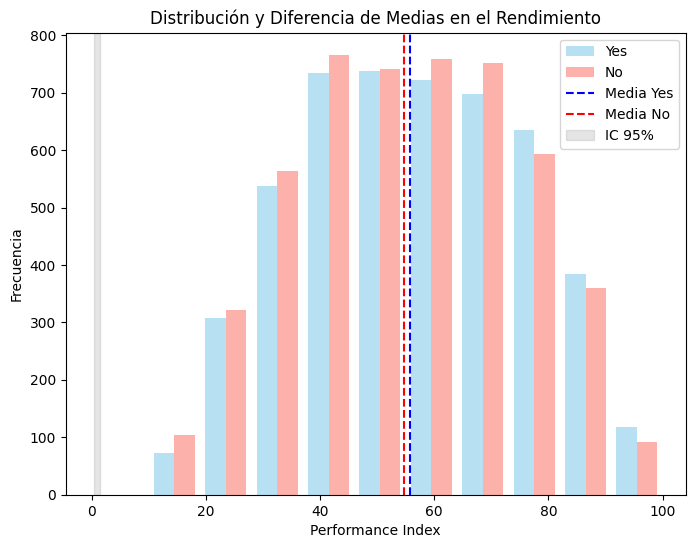

In [ ]:
group_yes = df[df['Extracurricular Activities'] == 'Yes']['Performance Index'] #creamos los grupos para poder interpretar las diferencias
group_no = df[df['Extracurricular Activities'] == 'No']['Performance Index']
mean_diff = group_yes.mean() - group_no.mean() #identificamos el promedio
ci = stats.t.interval(0.95, len(group_yes)-1, loc=mean_diff, scale=stats.sem(group_yes - group_no.mean()))

plt.figure(figsize=(8, 6))
plt.hist([group_yes, group_no], label=['Yes', 'No'], color=["skyblue", "salmon"], alpha=0.6, bins=10)
plt.axvline(group_yes.mean(), color="blue", linestyle="--", label="Media Yes")
plt.axvline(group_no.mean(), color="red", linestyle="--", label="Media No")
plt.axvspan(ci[0], ci[1], color="gray", alpha=0.2, label="IC 95%")
plt.title("Distribución y Diferencia de Medias en el Rendimiento")
plt.xlabel("Performance Index")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

En este histograma comparativo, se observa la distribución del Performance Index entre estudiantes que participan en actividades extracurriculares (Yes) y aquellos que no (No). Las líneas punteadas representan la media de cada grupo: la línea azul para el grupo Yes y la línea roja para el grupo No. La ligera diferencia entre ambas medias es destacada, con el grupo Yes mostrando un rendimiento promedio apenas superior. El área sombreada en gris muestra el intervalo de confianza del 95% para la diferencia de medias, lo cual respalda visualmente la significancia observada en la prueba estadística. Esta representación ayuda a ver cómo se distribuyen los valores de rendimiento en ambos grupos y la leve ventaja del grupo con actividades extracurriculares.

### **Análisis de datos atipicos**

In [ ]:
previous_scores_slider = widgets.IntRangeSlider(
    value=[50, 100],
    min=0,
    max=100,
    step=1,
    description='Previous Scores:',
    continuous_update=False
) #Creamos un slider

def update_boxplot(previous_scores_range): #creamos la funicón para poder jugar con cada boxplor
    filtered_df = df[(df['Previous Scores'] >= previous_scores_range[0]) & (df['Previous Scores'] <= previous_scores_range[1])]

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Previous Score Group', y='Performance Index', data=filtered_df, palette="pastel")
    plt.title(f"Rendimiento según Grupos de Puntajes Previos\n(Filtro: {previous_scores_range[0]} - {previous_scores_range[1]})")
    plt.show()

widgets.interactive(update_boxplot, previous_scores_range=previous_scores_slider) #conectamos los grupos a las cajas

interactive(children=(IntRangeSlider(value=(50, 100), continuous_update=False, description='Previous Scores:')…

En este boxplot, se compara el Performance Index entre tres grupos de puntaje previo (Bajo, Medio y Alto). Los estudiantes con puntajes previos altos tienden a tener un rendimiento superior, con un rango más elevado en comparación con los grupos Medio y Bajo. El grupo Alto muestra una mediana cercana a 80, mientras que el grupo Medio tiene una mediana alrededor de 60 y el grupo Bajo cerca de 40. Este gráfico destaca cómo un puntaje previo alto se asocia con un mejor rendimiento, mostrando una progresión clara en el Performance Index entre los distintos niveles de puntaje previo.

### **Análisis de distribución variables fuertes**

In [ ]:
distrib_selector = widgets.Dropdown(
    options=['Hours Studied', 'Previous Scores', 'Performance Index'],
    value='Hours Studied',
    description='Distribución de:',
) #creamos las opciones para el grafico

density_checkbox = widgets.Checkbox(
    value=True,
    description='Mostrar densidad',
) #creación de la caja para seleccionar las variables

def update_histogram(selected_var, show_density):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[selected_var], kde=show_density, color="lightcoral")
    plt.title(f"Distribución de {selected_var}")
    plt.xlabel(selected_var)
    plt.ylabel("Frecuencia")
    plt.show()

widgets.interactive(update_histogram, selected_var=distrib_selector, show_density=density_checkbox) #conectamos las variables al grafico

interactive(children=(Dropdown(description='Distribución de:', options=('Hours Studied', 'Previous Scores', 'P…

En estos histogramas, observamos las distribuciones de tres variables clave:

- Performance Index: La distribución es aproximadamente normal, con una mayor concentración alrededor de los valores medios, lo que indica que la mayoría de los estudiantes se sitúan en un rendimiento intermedio, aunque hay algunos en los extremos altos y bajos.

- Previous Scores: Los puntajes previos están bastante dispersos entre 40 y 100, mostrando una distribución casi uniforme, con ligeras variaciones y algunos picos en ciertos rangos.

- Hours Studied: Las horas estudiadas se distribuyen de manera uniforme entre 1 y 9 horas, sin una tendencia clara hacia un valor específico, lo que sugiere que los estudiantes tienen hábitos de estudio variados en cuanto al tiempo invertido.

### **Tabla de contingencia de la participación en actividades extracurriculares según grupo de puntaje previo**

In [ ]:
contingency_table = pd.crosstab(df['Previous Score Group'], df['Extracurricular Activities'], margins=True) #creamos la tabla de contingencia
print(tabulate(contingency_table, headers='keys', tablefmt='fancy_grid'))

╒════════════════════════╤══════╤═══════╤═══════╕
│ Previous Score Group   │   No │   Yes │   All │
╞════════════════════════╪══════╪═══════╪═══════╡
│ Bajo                   │  932 │   875 │  1807 │
├────────────────────────┼──────┼───────┼───────┤
│ Medio                  │ 2126 │  2062 │  4188 │
├────────────────────────┼──────┼───────┼───────┤
│ Alto                   │ 1994 │  2011 │  4005 │
├────────────────────────┼──────┼───────┼───────┤
│ All                    │ 5052 │  4948 │ 10000 │
╘════════════════════════╧══════╧═══════╧═══════╛


En esta tabla se muestra la cantidad de estudiantes en cada grupo de puntaje previo (Bajo, Medio y Alto) y su participación en actividades extracurriculares. Observamos que en cada grupo de puntaje, los estudiantes se dividen de forma relativamente equilibrada entre quienes participan (Yes) y quienes no (No) en actividades extracurriculares, aunque en el grupo Medio hay una mayor cantidad de estudiantes en general. En total, el conjunto de datos tiene 10,000 estudiantes, con una distribución casi equitativa en términos de participación en actividades extracurriculares entre los grupos de puntaje.